#### **DataPreProcessing**

In [1]:
import pandas as pd

dataset_combined_path = "../datastore/CombinedDataset-2024-12-12_16-24-25/combined_comments.csv"
df = pd.read_csv(dataset_combined_path)
display(df.head())

,Movie Name,Comment,Imdb Rating
0,Gladiator,I'm from Rome and i have never understood why ...,6.4
1,Gladiator,Some movie should never have a sequel. The fir...,6.4
2,Gladiator,Should have left it alone. Russell Crowe was ...,6.4
3,Gladiator,Next: Gladiator Vs. the Invaders from Saturn. ...,6.4
4,Gladiator,what is up with Denzel NY accent? man this mov...,6.4


#### **Annotating the extracted comments with Vader SentimentIntensityAnalyzer** 

In [2]:
#Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer


from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

#### **Downloading Vader Lexicon**

In [3]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sreeh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### **Calculating Sentiment Intensity using Vader**

In [4]:
import pandas as pd


df = pd.read_csv(dataset_combined_path)
display(df.head())
data = df.copy()
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Comment"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Comment"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Comment"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["Comment"]]
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data["Sentiment"] = sentiment
display(data.head())

,Movie Name,Comment,Imdb Rating
0,Gladiator,I'm from Rome and i have never understood why ...,6.4
1,Gladiator,Some movie should never have a sequel. The fir...,6.4
2,Gladiator,Should have left it alone. Russell Crowe was ...,6.4
3,Gladiator,Next: Gladiator Vs. the Invaders from Saturn. ...,6.4
4,Gladiator,what is up with Denzel NY accent? man this mov...,6.4


,Movie Name,Comment,Imdb Rating,Positive,Negative,Neutral,Compound,Sentiment
0,Gladiator,I'm from Rome and i have never understood why ...,6.4,0.000,0.000,1.000,0.0000,Neutral
1,Gladiator,Some movie should never have a sequel. The fir...,6.4,0.215,0.000,0.785,0.6249,Positive
2,Gladiator,Should have left it alone. Russell Crowe was ...,6.4,0.314,0.098,0.588,0.6597,Positive
3,Gladiator,Next: Gladiator Vs. the Invaders from Saturn. ...,6.4,0.000,0.049,0.951,-0.1007,Negative
4,Gladiator,what is up with Denzel NY accent? man this mov...,6.4,0.000,0.000,1.000,0.0000,Neutral


In [5]:
display(data[data["Sentiment"]=="Negative"].head(10))

,Movie Name,Comment,Imdb Rating,Positive,Negative,Neutral,Compound,Sentiment
3,Gladiator,Next: Gladiator Vs. the Invaders from Saturn. ...,6.4,0.000,0.049,0.951,-0.1007,Negative
8,Gladiator,There is only one Gladiator. His name is Maxi...,6.4,0.094,0.140,0.766,-0.5994,Negative
19,Gladiator,perhaps because gladiator fights took place in...,6.4,0.000,0.213,0.787,-0.4019,Negative
26,Gladiator,@JamesSmithTexas what's wrong to show the tru...,6.4,0.112,0.124,0.763,-0.0772,Negative
33,Gladiator,Why do I get the feeling you're fighting with ...,6.4,0.088,0.147,0.765,-0.2500,Negative
41,Gladiator,"I will watch the sequel, but Im not impressed ...",6.4,0.000,0.114,0.886,-0.5157,Negative
47,Gladiator,​ @NnaemekaAmamasi Who exactly was fighting w...,6.4,0.000,0.201,0.799,-0.6467,Negative
49,Gladiator,@zoomeraygun1 This cast is but shadows and dus...,6.4,0.120,0.187,0.693,-0.3871,Negative
50,Gladiator,Why wait for 24 years for the part two very weird,6.4,0.000,0.166,0.834,-0.2484,Negative
59,Gladiator,​@mathewyerry2072 it's not trust me it's not! ...,6.4,0.107,0.188,0.705,-0.3402,Negative


Challenges

- There will be a lot of comments which are not related to the movie itself. 
- Will revisit this later.

#### **Plot**

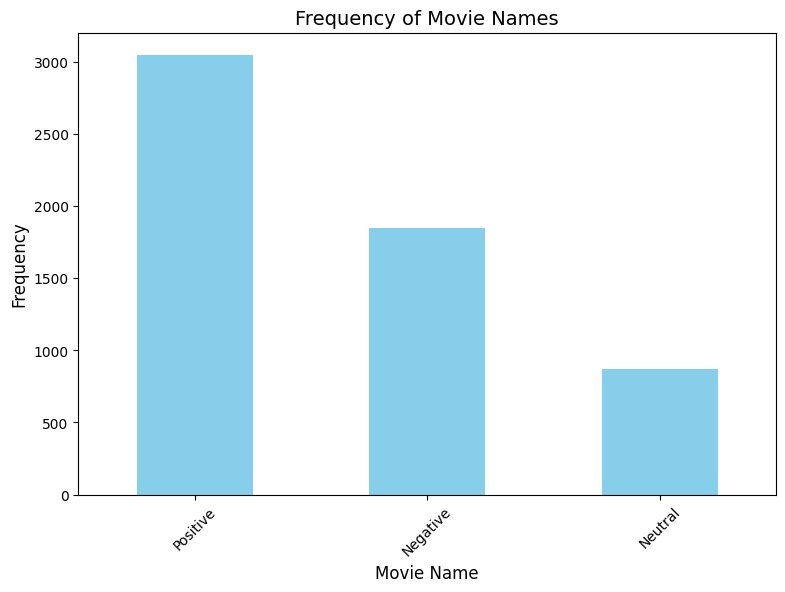

In [6]:
# Plotting the bar graph
plt.figure(figsize=(9, 6))
value_counts = data['Sentiment'].value_counts()
value_counts.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Frequency of Movie Names', fontsize=14)
plt.xlabel('Movie Name', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()

#### **Split of Sentiments / Movie**

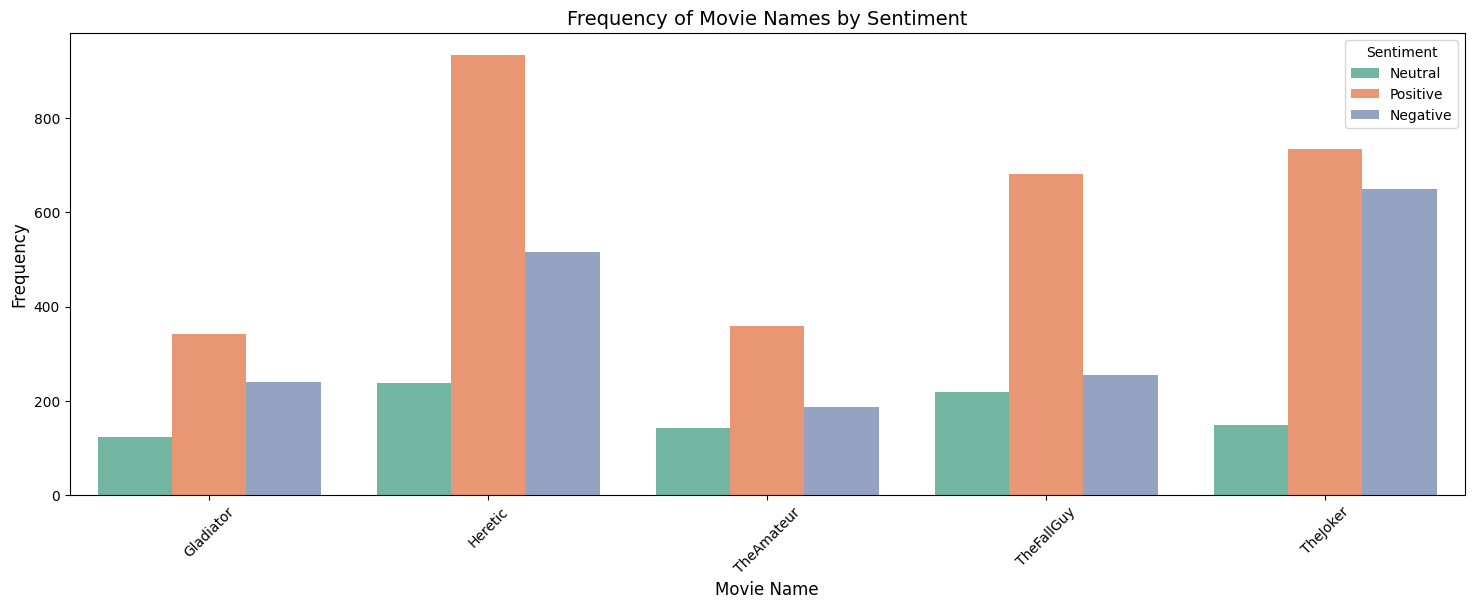

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the grouped bar graph using seaborn
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='Movie Name', hue='Sentiment', palette='Set2')

# Adding titles and labels
plt.title('Frequency of Movie Names by Sentiment', fontsize=14)
plt.xlabel('Movie Name', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()


#### **Calculating Score**

In [8]:
def calculate_score(dataframe):
    required_columns = ['Sentiment', 'Imdb Rating', 'Positive', 'Negative', 'Neutral']
    for col in required_columns:
        if col not in dataframe.columns:
            raise ValueError(f"DataFrame must contain the following column: {col}")

    def compute_score(row):
        if row['Sentiment'] == 'Positive':
            return row['Imdb Rating'] * 10 * row['Positive']
        elif row['Sentiment'] == 'Negative':
            return -10 * row['Imdb Rating'] * row['Negative']
        elif row['Sentiment'] == 'Neutral':
            return row['Imdb Rating'] * row['Neutral']
        else:
            return 0  

    dataframe['Score'] = dataframe.apply(compute_score, axis=1)    
    return dataframe

score_df = calculate_score(data)


def calculate_outcome(dataframe):
    required_columns = ['Sentiment', 'Imdb Rating', 'Positive', 'Negative', 'Neutral']
    for col in required_columns:
        if col not in dataframe.columns:
            raise ValueError(f"DataFrame must contain the following column: {col}")

    def compute_score(row):
        if row['Imdb Rating'] < 6:
            return "Flop"
        elif row['Imdb Rating'] < 7.5:
            return "Average"
        elif row['Imdb Rating'] < 10:
            return "Hit"
        else:
            return 0  

    dataframe['Verdict'] = dataframe.apply(compute_score, axis=1)    
    return dataframe

outcome_df = calculate_outcome(score_df)

#### **Plot**

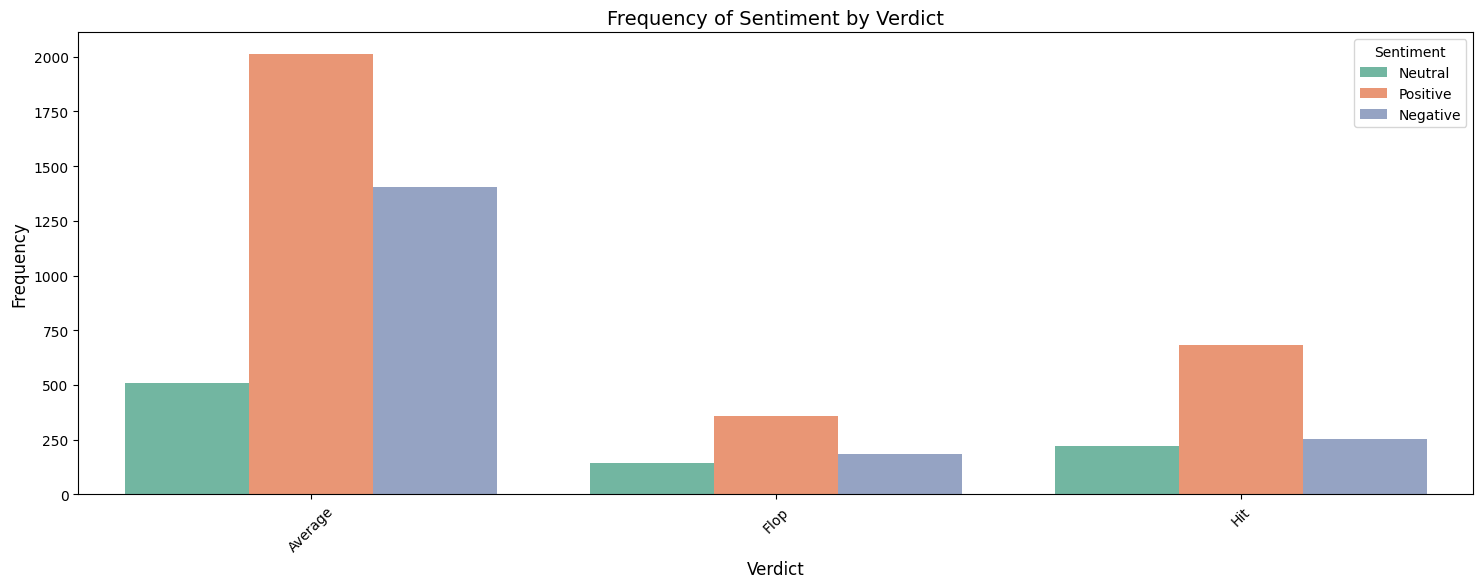

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the grouped bar graph using seaborn
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='Verdict', hue='Sentiment', palette='Set2')

# Adding titles and labels
plt.title('Frequency of Sentiment by Verdict', fontsize=14)
plt.xlabel('Verdict', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [10]:
# Define the folder where you want to save the CSV
from datetime import datetime
display(outcome_df)
timestamp = datetime.now().strftime('%Y-%m-%H-%M')
folder = "../cleaned"
filename = f"movie_comments_{timestamp}.csv"

# Check if the folder exists, if not create it
if not os.path.exists(folder):
    os.makedirs(folder)

# Save the DataFrame as a CSV file in the specified folder
file_path = os.path.join(folder, filename)
score_df.to_csv(file_path, index=False)

,Movie Name,Comment,Imdb Rating,Positive,Negative,Neutral,Compound,Sentiment,Score,Verdict
0,Gladiator,I'm from Rome and i have never understood why ...,6.4,0.000,0.000,1.000,0.0000,Neutral,6.400,Average
1,Gladiator,Some movie should never have a sequel. The fir...,6.4,0.215,0.000,0.785,0.6249,Positive,13.760,Average
2,Gladiator,Should have left it alone. Russell Crowe was ...,6.4,0.314,0.098,0.588,0.6597,Positive,20.096,Average
3,Gladiator,Next: Gladiator Vs. the Invaders from Saturn. ...,6.4,0.000,0.049,0.951,-0.1007,Negative,-3.136,Average
4,Gladiator,what is up with Denzel NY accent? man this mov...,6.4,0.000,0.000,1.000,0.0000,Neutral,6.400,Average
...,...,...,...,...,...,...,...,...,...,...
5761,TheJoker,This was up there with Batman vs Superman and ...,6.0,0.000,0.257,0.743,-0.7343,Negative,-15.420,Average
5762,TheJoker,I wish I paid for tickets to venom last dance ...,6.0,0.244,0.000,0.756,0.4939,Positive,14.640,Average
5763,TheJoker,Wake up people. These people absolutely hate y...,6.0,0.000,0.330,0.670,-0.7837,Negative,-19.800,Average
5764,TheJoker,"This movie was so bad, that now I want to be s...",6.0,0.073,0.252,0.674,-0.6359,Negative,-15.120,Average
